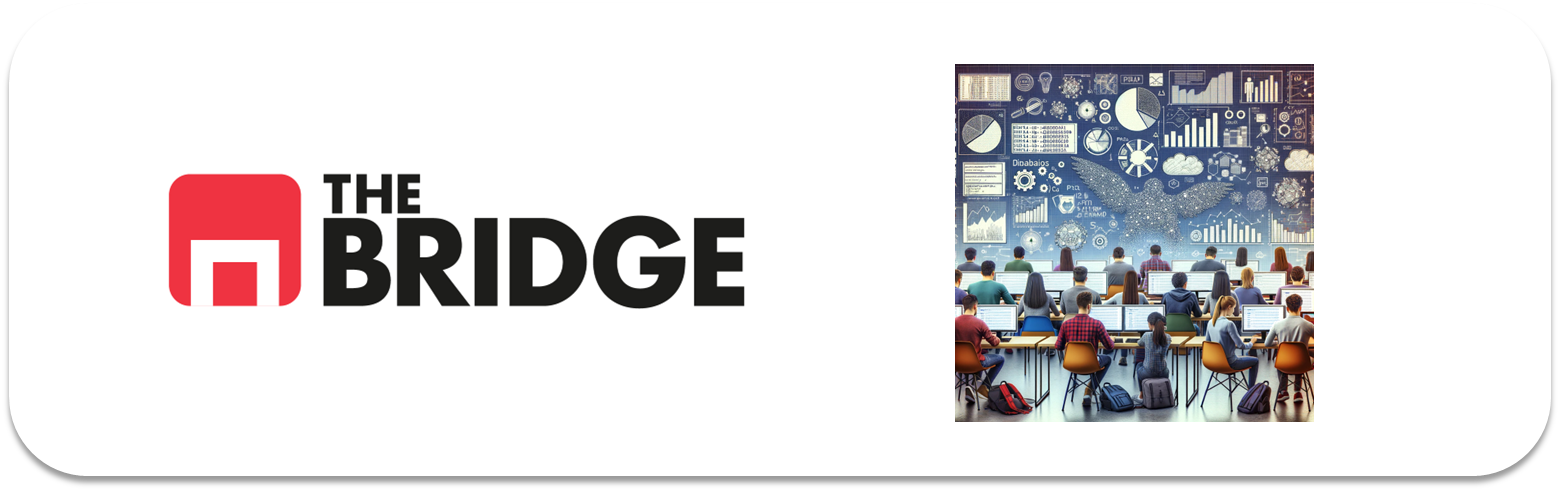

## PRACTICA OBLIGATORIA: **Clasificacion y Regresion Logistica**

* La práctica obligatoria de esta unidad consiste en modelar la supervivencia en el Titanic, por fin, además de una parte adicional multiclase. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión logística, evaluarlo contra un dataset de test reservado del original mostrando las métricas propias de los problemas de clasificación, la matriz de confusión y la curva ROC. Además se pide comparar las predicciones con los valores reales y al final adaptar el modelo a un problema multiclase.

Los pasos para guiar el trabajo:
1. Carga el dataset del Titanic. 
2. Deshazte de las variables que no vayas a usar. Limpia lo que creas necesarios pero no hagas imputaciones.
3. Escoge y analiza la variable target de forma gráfica y razona sobre el impacto de la distribución en los resultados esperados. Ten en cuenta que lo que queremos es poder predecir si un pasajero sobrevivirá.
4. Haz el split en train y test que creas conveniente pero asegurándote que ambos conjuntos tienen un reparto similar de pasajeros embarcados en las tres ciudades.
5. Construye las parejas X,y de train y test.
6. Ahora sí imputa los nulos con medias y modas en la X de train. Guarda esas medias que necesitarás en la parte de test.
7. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
8. Trata las variables para que funcionen lo mejor posible en el modelo.
9. Construye un modelo de regresión logística.
10. EXTRA: Analiza si lo crees conveniente los pesos y la importancia de las features.
11. Procesa el dataset de Test para que puedas usarlo en la evaluación 
12. Evalúa tu modelo contra el dataset de test y train. Obten las matrices de confusión y las métricas que creas adecuadas. Haz un pequeño assesment de su generabilidad.
13. EXTRA: Halla la probabilidad de supervivencia de un hombre de entre 30 y 40 años, que embarcó en Southampton, viajaba solo y no pagó el billete. Para ello recuerda que la probabilidad del suceso unión de sucesos indepentientes es la suma de las probabilidades de los sucesos por separado (PISTA: Aplicalo a la edad)
14. EXTRA: Aprovecha todo el trabajo haciendo un único cambio en el target, ahora será la clase del viajero. Cambia el target quitándolo de X_train, X_test y añade a estos el target anterior. El resto no deberías cambiarlo. Entrena y evalua el modelo sólo con el classification_report.  



### 0. Importar librerias y modulos

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split 
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, roc_curve, roc_auc_score, confusion_matrix

* Problema de negocio: Modelar la supervivencia del titanic

### 1. Carga Dataset

In [31]:
df=pd.read_csv("./data/titanic.csv")
df.head(20)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [33]:
# columnas con nulos
nulos=[]
for col in df.columns:
    if df[col].isna().any():
        nulos.append(col)
print(nulos)


['age', 'embarked', 'deck', 'embark_town']


### 2. Limpieza

Voy a eliminar las columnas que se repitan y quedarme con las que estén con valores numéricos:
* Me quedo con ``survived`` y borro ``alive``
* Me quedo con ``pclass`` y borro ``class``
* Hago una nueva categoría con embarked, S =1, C=2, Q=3, borro ``embarked`` y ``embark_town``
* Hago una nueva categoría con sex, M =1, F=0,  borro ``sex``
* Las columnas ``sibsp``y  ``parch`` no me interesan
* Las columnas ``who`` y ``adult_male`` tampoco me interesan (son la misma)

En resumen, me quedo con ``survived, pclass, age, fare, embarked_cat, sex_cat y alone_cat``

In [34]:
# Transformo categoricas
df['embarked_cat'] = (df['embarked'].map({'S': 1, 'C': 2, 'Q': 3}))
df['sex_cat'] = (df['sex'] == 'male').astype(int)
df['alone_cat'] = (df['alone'] == True).astype(int)

Imputo la moda a a categoria embarked_cat, ya que va a ser mi variable para estratificar y necesito que este perfecta, ademas solo hay 2 valores NaN... sin hacerlo como debería no creo que varie demasiado el proceso

In [35]:
# Moda
df["embarked_cat"].value_counts() #es 1

embarked_cat
1.0    644
2.0    168
3.0     77
Name: count, dtype: int64

In [36]:
# Reemplazar NaN
df['embarked_cat'].fillna(1, inplace=True)

In [37]:
# Transformo
df['embarked_cat'] = df['embarked_cat'].astype(int)

In [38]:
# Elimino columnas
df.drop(['alive', 'class', 'embarked', 'embark_town', 'sex','alone', 'who', 'adult_male','sibsp','parch', 'deck'], axis=1, inplace=True)

In [39]:
df.head()

,survived,pclass,age,fare,embarked_cat,sex_cat,alone_cat
0,0,3,22.0,7.2500,1,1,0
1,1,1,38.0,71.2833,2,0,0
2,1,3,26.0,7.9250,1,0,1
3,1,1,35.0,53.1000,1,0,0
4,0,3,35.0,8.0500,1,1,1


In [40]:
# mis features son las siguiente
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   survived      891 non-null    int64  
 1   pclass        891 non-null    int64  
 2   age           714 non-null    float64
 3   fare          891 non-null    float64
 4   embarked_cat  891 non-null    int32  
 5   sex_cat       891 non-null    int32  
 6   alone_cat     891 non-null    int32  
dtypes: float64(2), int32(3), int64(2)
memory usage: 38.4 KB


Aun tenemos 277 NaN en la variable age...

### 3. Analisis Target

Como mi modelado va a ser de supervivencia, mi target será la variable ``survived``. Hago un miniestudio de ella.

Text(0.5, 0, 'Survived')

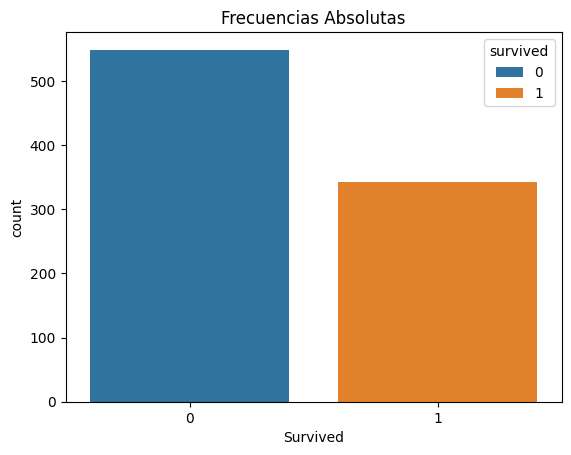

In [41]:
#Frecuencias Absolutas
sns.countplot(x= "survived", data = df, hue = "survived")
plt.title("Frecuencias Absolutas")
plt.xlabel("Survived")


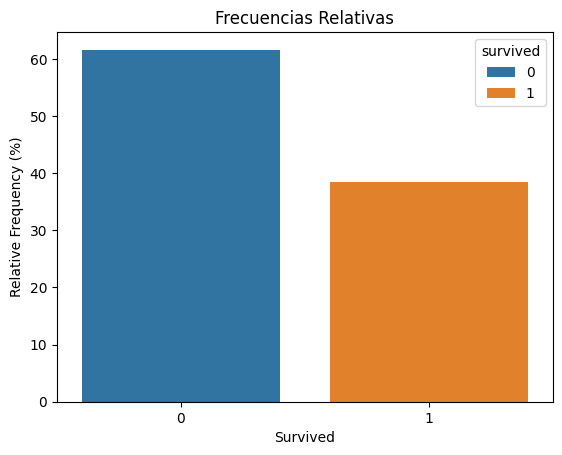

In [42]:
sns.barplot(x="survived", y="survived", data=df, hue="survived", estimator=lambda x: len(x) / len(df) * 100)
plt.title("Frecuencias Relativas")
plt.xlabel("Survived")
plt.ylabel("Relative Frequency (%)")
plt.show()

In [43]:
df['survived'].value_counts(normalize=True)

survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

Tiene buena pinta para usar la metrica accuracy.

### 4. Analisis Features

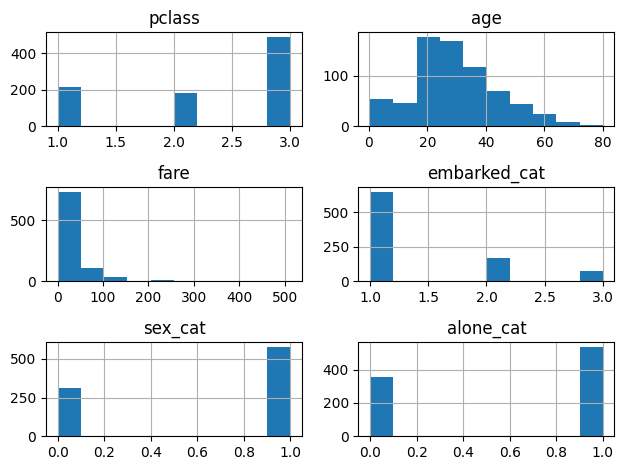

In [44]:
# Vistazo a las features
df.drop("survived", axis=1).hist()
plt.tight_layout()

En general vemos que las categóricas estan altamente distribuidas. Vamos a hacer una vision en particular a embarked_cat(S=1, C=2, Q=3). Y las numéricas como ``age`` tiene una pinta de distribucion casi normal, mientras que ``fare`` podría parecer que tiene una larga cola, aplicaremos una transformacion.

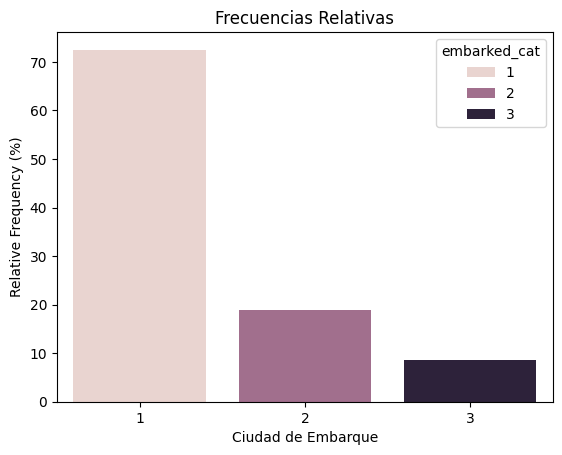

In [45]:
sns.barplot(x="embarked_cat", y="embarked_cat", data=df, hue="embarked_cat", estimator=lambda x: len(x) / len(df) * 100)
plt.title("Frecuencias Relativas")
plt.xlabel("Ciudad de Embarque")
plt.ylabel("Relative Frequency (%)")
plt.show()

In [46]:
df['embarked_cat'].value_counts(normalize=True)

embarked_cat
1    0.725028
2    0.188552
3    0.086420
Name: proportion, dtype: float64

### 5. Split Train/Test

In [47]:
# Target
target=df["survived"]

# Features

features=df.drop(['survived'], axis=1)

In [48]:
from sklearn.model_selection import StratifiedShuffleSplit

X = features
y = target

# variable para el split estratificado
var_strat = df["embarked_cat"]

# Crear un objeto StratifiedShuffleSplit
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Obtener los índices de entrenamiento y prueba
for train_index, test_index in stratified_split.split(X, var_strat):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Verificar la proporción de la variable estratificada en los conjuntos de entrenamiento y prueba
print("Proporción de clases en el conjunto de entrenamiento:")
print(X_train["embarked_cat"].value_counts(normalize=True))

print("\nProporción de clases en el conjunto de prueba:")
print(X_test["embarked_cat"].value_counts(normalize=True))


Proporción de clases en el conjunto de entrenamiento:
embarked_cat
1    0.724719
2    0.188202
3    0.087079
Name: proportion, dtype: float64

Proporción de clases en el conjunto de prueba:
embarked_cat
1    0.726257
2    0.189944
3    0.083799
Name: proportion, dtype: float64


Los valores se asemejan mucho entre ellos y a los del dataset

### 7. Mini-EDA

In [49]:
# creo dataframe
df_eda= X_train.copy()
df_eda["survived"] = y_train.copy()

In [50]:
np.abs(df_eda.corr()['survived']).sort_values(ascending=False)

survived        1.000000
sex_cat         0.541871
pclass          0.332955
fare            0.273360
alone_cat       0.210801
embarked_cat    0.123811
age             0.084921
Name: survived, dtype: float64

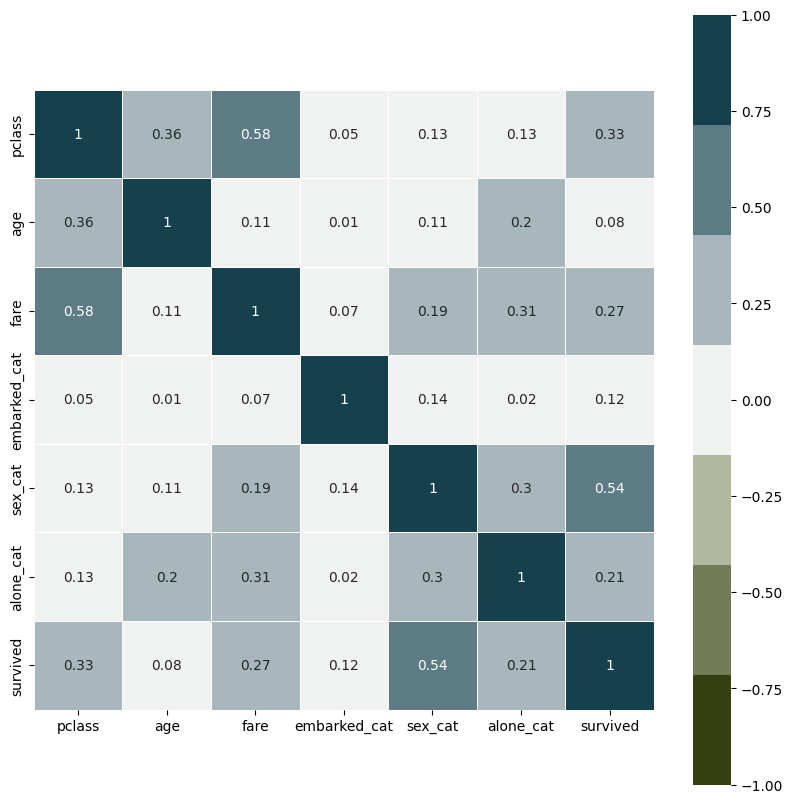

In [51]:
# Mapa de calor el valores absolutos
plt.figure(figsize=(10,10))
sns.heatmap(np.round(np.abs(df_eda.corr()), 2),
            vmin=-1,
            vmax=1,
            annot=True,
            cmap=sns.diverging_palette(100, 220, s=85, l=25, n=7),
            square=True,
            linewidths=.5);

En general las variables escogidas, no correlan demasiado entre ellas.

### 8. Tratamiento de variables

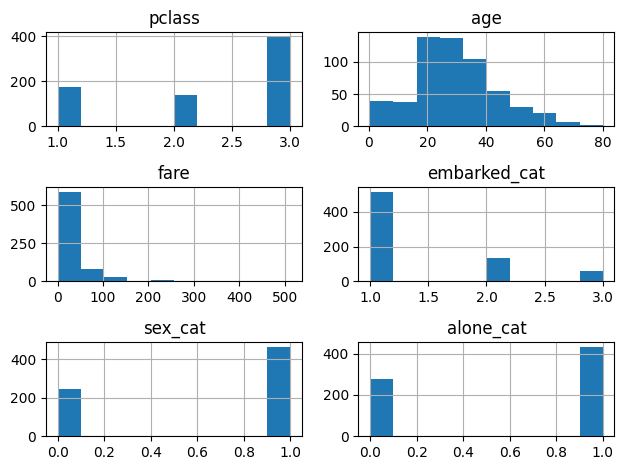

In [52]:
# vistazo de las features:
X_train.hist()
plt.tight_layout()

Vamos a quitarle la larga cola a fare y a quitar nulos en age. Ademas los vamos a escalar para que esten a en la misma onda.

In [53]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 198 to 295
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   pclass        712 non-null    int64  
 1   age           571 non-null    float64
 2   fare          712 non-null    float64
 3   embarked_cat  712 non-null    int32  
 4   sex_cat       712 non-null    int32  
 5   alone_cat     712 non-null    int32  
dtypes: float64(2), int32(3), int64(1)
memory usage: 30.6 KB


In [54]:
#Tratamiento de  age
valor_medio=X_train["age"].mean()
X_train["age"].fillna(valor_medio, inplace=True)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 198 to 295
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   pclass        712 non-null    int64  
 1   age           712 non-null    float64
 2   fare          712 non-null    float64
 3   embarked_cat  712 non-null    int32  
 4   sex_cat       712 non-null    int32  
 5   alone_cat     712 non-null    int32  
dtypes: float64(2), int32(3), int64(1)
memory usage: 30.6 KB


C:\Users\Martín Ámez Segovia\AppData\Local\Temp\ipykernel_14416\3479177576.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["age"].fillna(valor_medio, inplace=True)


C:\Users\Martín Ámez Segovia\AppData\Local\Temp\ipykernel_14416\177661532.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['fare_scaled'] = np.log1p(X_train['fare'].copy())  # Usar log1p para evitar logaritmo de cero
C:\Users\Martín Ámez Segovia\AppData\Local\Temp\ipykernel_14416\177661532.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['fare'] = fare_scaler.fit_transform(X_train[['fare_scaled']])
C:\Users\Martín Ámez Segovia\AppData\Local\Temp\ipykernel_14416\177661532.py:8: SettingW

array([[<Axes: title={'center': 'fare'}>,
        <Axes: title={'center': 'age'}>]], dtype=object)

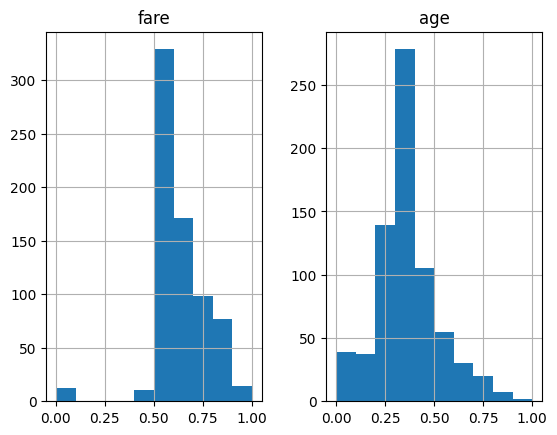

In [69]:
# Escalar la columna 'fare'
X_train['fare_scaled'] = np.log1p(X_train['fare'].copy())  # Usar log1p para evitar logaritmo de cero
fare_scaler = MinMaxScaler(feature_range=(0, 1))
X_train['fare'] = fare_scaler.fit_transform(X_train[['fare_scaled']])

# Escalar la columna 'age'
age_scaler = MinMaxScaler(feature_range=(0, 1))
X_train['age'] = age_scaler.fit_transform(X_train[['age']])

# Visualizar histogramas
X_train[['fare', 'age']].hist()


In [57]:
X_train.fare.describe()

count    712.000000
mean      30.703990
std       44.664347
min        0.000000
25%        7.925000
50%       14.054150
75%       30.000000
max      512.329200
Name: fare, dtype: float64

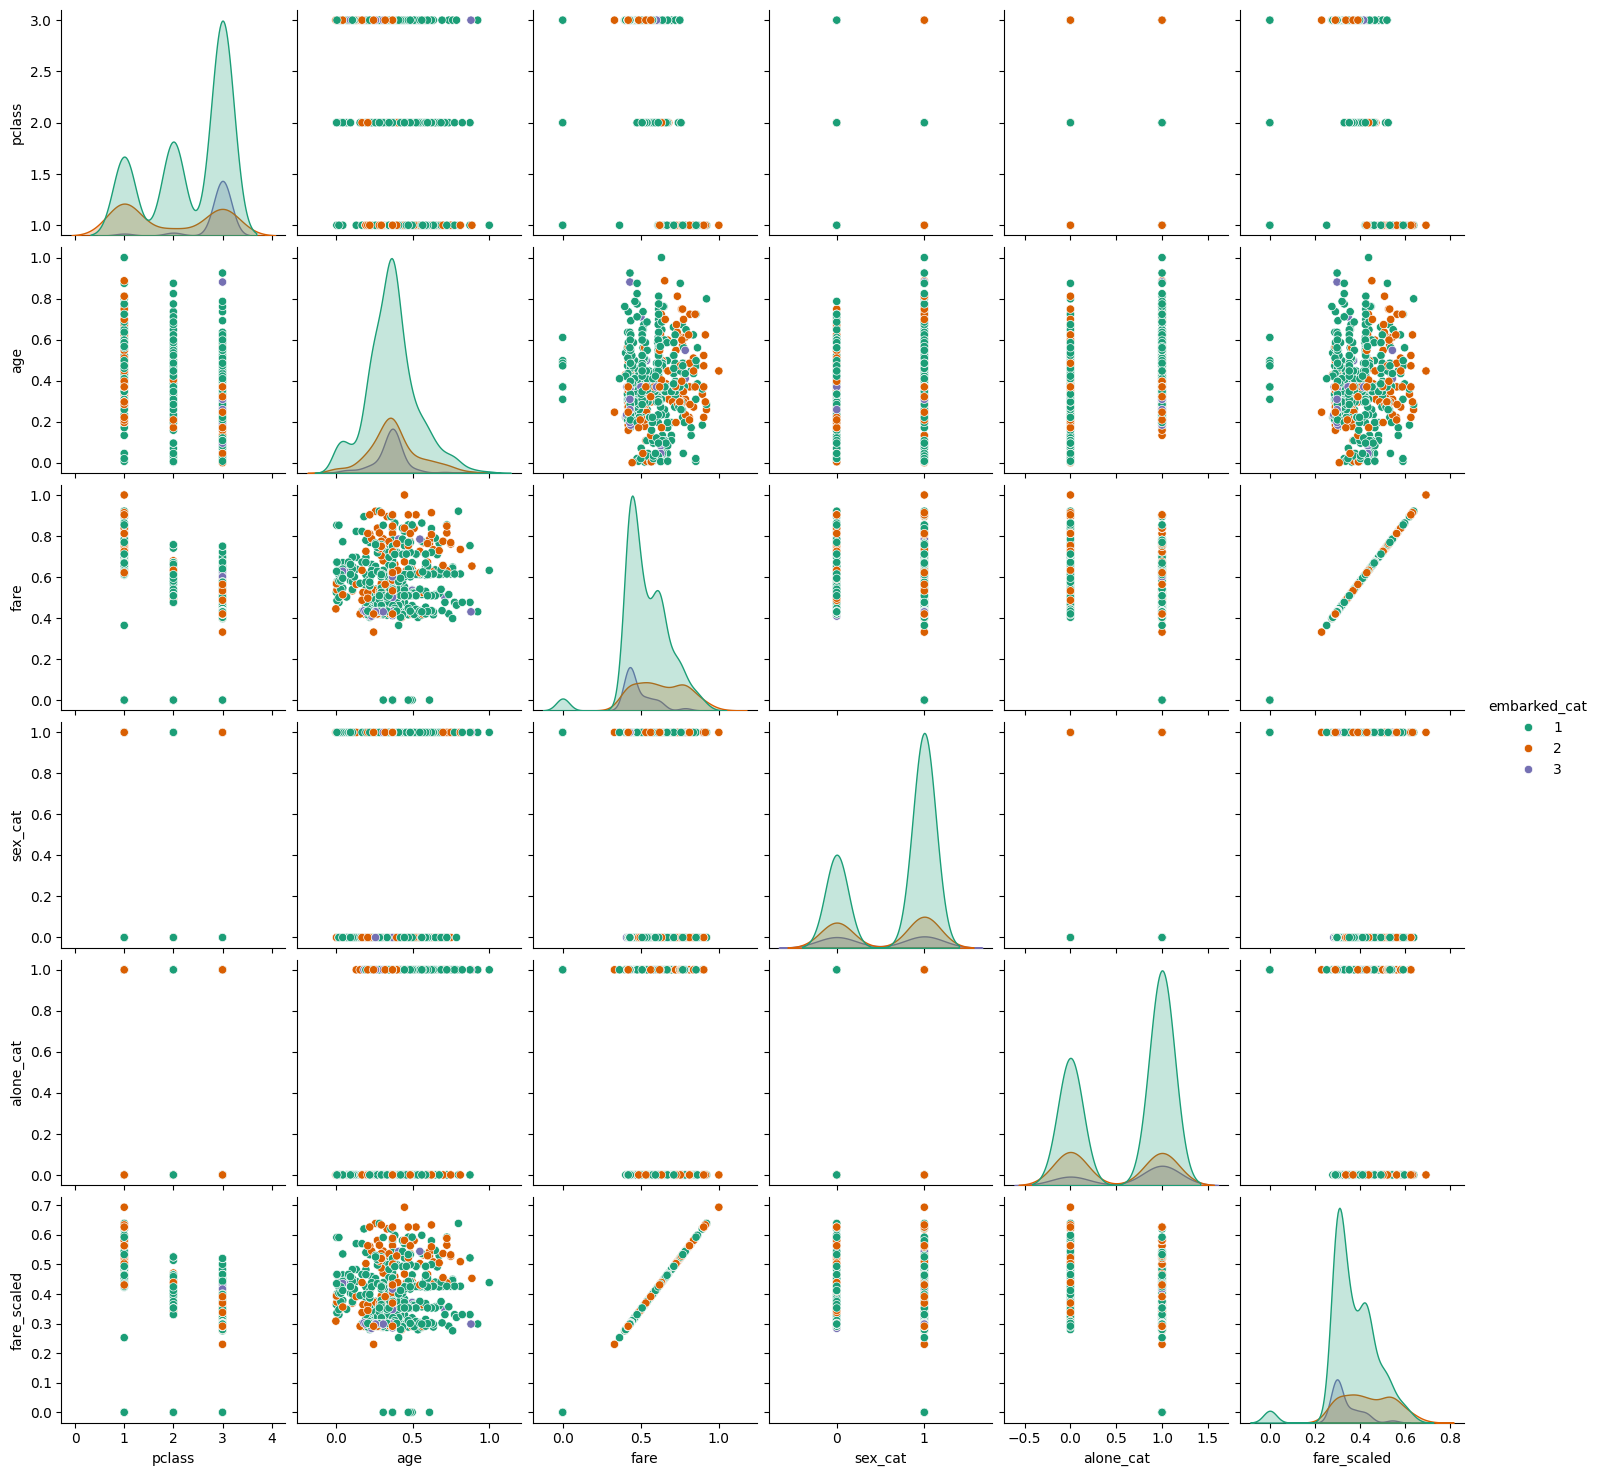

In [68]:

sns.pairplot(X_train, hue="embarked_cat", palette="Dark2")
plt.show()

In [ ]:
# transformacion en y_train?

### 9. Transformacione en el test

In [59]:
# Escalar la columna 'fare'

X_test['fare_scaled'] = np.log1p(X_test['fare'])  # Usar log1p para evitar logaritmo de cero
fare_scaler = MinMaxScaler(feature_range=(0, 1))
X_test['fare_scaled'] = fare_scaler.fit_transform(X_test[['fare']])

# Escalar la columna 'age'
age_scaler = MinMaxScaler(feature_range=(0, 1))
X_test['age'] = age_scaler.fit_transform(X_test[['age']])

C:\Users\Martín Ámez Segovia\AppData\Local\Temp\ipykernel_14416\805966753.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['fare_scaled'] = np.log1p(X_test['fare'])  # Usar log1p para evitar logaritmo de cero
C:\Users\Martín Ámez Segovia\AppData\Local\Temp\ipykernel_14416\805966753.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['fare_scaled'] = fare_scaler.fit_transform(X_test[['fare']])
C:\Users\Martín Ámez Segovia\AppData\Local\Temp\ipykernel_14416\805966753.py:9: SettingWithCopyWarn

### 10. Modelado

In [70]:
log_reg = LogisticRegression(max_iter = 5000)

log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [72]:
#Coeficientes/Pesos

intercept = log_reg.intercept_
coefs = log_reg.coef_.ravel()

features = pd.DataFrame(coefs, X_train.columns, columns=['coefficient']).copy()
features['coefficient'] = np.abs(features['coefficient'])

features.sort_values('coefficient', ascending=False).head()

,coefficient
sex_cat,2.393472
age,1.786599
pclass,0.999731
fare,0.468606
embarked_cat,0.326304


### 11. Accuracy

In [73]:
#copio transformaciones en 
X_test = X_test[X_train.columns].copy()

In [76]:
#Tratamiento de  age
valor_medio_2=X_test["age"].mean()
X_test["age"].fillna(valor_medio_2, inplace=True)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179 entries, 748 to 773
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   pclass        179 non-null    int64  
 1   age           179 non-null    float64
 2   fare          179 non-null    float64
 3   embarked_cat  179 non-null    int32  
 4   sex_cat       179 non-null    int32  
 5   alone_cat     179 non-null    int32  
 6   fare_scaled   179 non-null    float64
dtypes: float64(3), int32(3), int64(1)
memory usage: 9.1 KB


In [77]:
from sklearn.metrics import accuracy_score

acc_train = round(accuracy_score(log_reg.predict(X_train), y_train), 3)
acc_test = round(accuracy_score(log_reg.predict(X_test), y_test), 3)

print("Accuracy train:", acc_train)
print("Accuracy test:", acc_test)

Accuracy train: 0.795
Accuracy test: 0.464


### 11. Verificamos modelo

In [78]:
y_train.value_counts(True)

survived
0    0.632022
1    0.367978
Name: proportion, dtype: float64

In [79]:
y_test.value_counts(True)

survived
0    0.553073
1    0.446927
Name: proportion, dtype: float64

La accuracy del X_test, se parece a la accuracy de y_test, podriamos decir que el modelo es bastante consistente

### 12. Matriz de confusion

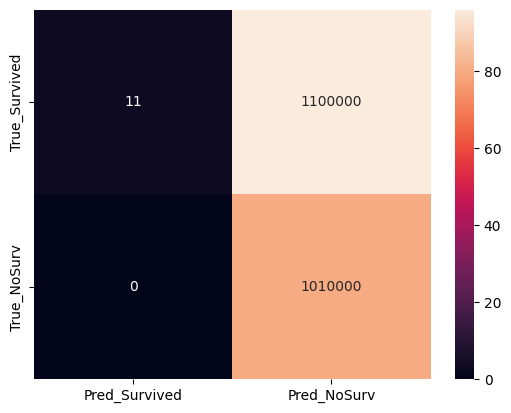

In [85]:
from sklearn.metrics import confusion_matrix

c_matrix = confusion_matrix(y_test, log_reg.predict(X_test))

c_matrix_df = pd.DataFrame(c_matrix, columns = ['Pred_Survived', 'Pred_NoSurv'],
                          index = ['True_Survived', 'True_NoSurv'])

sns.heatmap(c_matrix_df, annot=True, fmt='b');